In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from matplotlib import animation, colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#D:\ClimateChange\RawData\ROI_Pressure\MinMax
data =  pd.read_csv('../RawData/ROI_Pressure/MinMax/year2_minmax_cutfirst_normfirst_xy_map.csv',index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,...,222.1,223.1,224.1,225,226,227,228,229,230,label
0,0.266183,0.267322,0.267839,0.268356,0.269669,0.271125,0.272727,0.274101,0.276006,0.277690,...,0.024460,0.024566,0.025473,0.920792,0.115385,1.0,1.0,0.0,0.0,CL
1,0.548938,0.548604,0.548087,0.547053,0.546066,0.545360,0.544935,0.543512,0.542081,0.540682,...,0.390762,0.397230,0.405797,0.980198,0.403846,1.0,1.0,0.0,1.0,CL
2,0.357846,0.355222,0.353671,0.352637,0.352484,0.353033,0.354286,0.356436,0.358599,0.361680,...,0.064879,0.068301,0.073843,0.297030,0.346154,0.0,1.0,0.0,1.0,CL
3,0.357846,0.355222,0.353671,0.352637,0.352484,0.353033,0.354286,0.356436,0.358599,0.361680,...,0.064879,0.068301,0.073843,0.297030,0.346154,0.0,1.0,0.0,1.0,CL
4,0.395650,0.389866,0.385729,0.382110,0.380435,0.378953,0.378182,0.378843,0.378986,0.380577,...,0.038095,0.039508,0.041927,0.297030,0.326923,0.0,1.0,0.0,1.0,CL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.859658,0.870734,0.885212,0.897622,0.903209,0.907206,0.908052,0.908286,0.905907,0.900787,...,0.923706,0.930254,0.939836,0.940594,0.884615,1.0,1.0,1.0,1.0,NROI
733,0.916624,0.919855,0.928128,0.934333,0.938406,0.943494,0.947013,0.950495,0.952953,0.955381,...,0.966330,0.968750,0.972835,0.940594,0.980769,1.0,1.0,1.0,1.0,NROI
734,0.932160,0.934850,0.934850,0.935884,0.937371,0.938310,0.940260,0.941636,0.944067,0.949606,...,0.970248,0.974210,0.970785,0.742574,0.923077,1.0,0.0,1.0,1.0,NROI
735,0.879855,0.885729,0.891417,0.895553,0.898551,0.900985,0.902338,0.903075,0.903293,0.902887,...,0.945185,0.950480,0.956458,0.762376,0.865385,1.0,1.0,1.0,1.0,NROI


In [3]:
data_x = data.iloc[:,:456]
data_y = data['label']

In [4]:
data_x

,0,1,2,3,4,5,6,7,8,9,...,221.1,222.1,223.1,224.1,225,226,227,228,229,230
0,0.266183,0.267322,0.267839,0.268356,0.269669,0.271125,0.272727,0.274101,0.276006,0.277690,...,0.022989,0.024460,0.024566,0.025473,0.920792,0.115385,1.0,1.0,0.0,0.0
1,0.548938,0.548604,0.548087,0.547053,0.546066,0.545360,0.544935,0.543512,0.542081,0.540682,...,0.386431,0.390762,0.397230,0.405797,0.980198,0.403846,1.0,1.0,0.0,1.0
2,0.357846,0.355222,0.353671,0.352637,0.352484,0.353033,0.354286,0.356436,0.358599,0.361680,...,0.062123,0.064879,0.068301,0.073843,0.297030,0.346154,0.0,1.0,0.0,1.0
3,0.357846,0.355222,0.353671,0.352637,0.352484,0.353033,0.354286,0.356436,0.358599,0.361680,...,0.062123,0.064879,0.068301,0.073843,0.297030,0.346154,0.0,1.0,0.0,1.0
4,0.395650,0.389866,0.385729,0.382110,0.380435,0.378953,0.378182,0.378843,0.378986,0.380577,...,0.037005,0.038095,0.039508,0.041927,0.297030,0.326923,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.859658,0.870734,0.885212,0.897622,0.903209,0.907206,0.908052,0.908286,0.905907,0.900787,...,0.934562,0.923706,0.930254,0.939836,0.940594,0.884615,1.0,1.0,1.0,1.0
733,0.916624,0.919855,0.928128,0.934333,0.938406,0.943494,0.947013,0.950495,0.952953,0.955381,...,0.964795,0.966330,0.968750,0.972835,0.940594,0.980769,1.0,1.0,1.0,1.0
734,0.932160,0.934850,0.934850,0.935884,0.937371,0.938310,0.940260,0.941636,0.944067,0.949606,...,0.969522,0.970248,0.974210,0.970785,0.742574,0.923077,1.0,0.0,1.0,1.0
735,0.879855,0.885729,0.891417,0.895553,0.898551,0.900985,0.902338,0.903075,0.903293,0.902887,...,0.940565,0.945185,0.950480,0.956458,0.762376,0.865385,1.0,1.0,1.0,1.0


# Kmean

In [5]:
kmeans = KMeans(n_clusters =4).fit(data_x)
kmeans.labels_

array([3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 1,

In [ ]:
path = '../RawData/ROI_Pressure/Unnormed/year2_xy_unnormed.csv'
results = []
result_label = []
for a in range (4):
    for b in range (4):
        for c in range (4):
            for d in range (4):
                data =  pd.read_csv(path,index_col=0)
                data_y = data['label']
                for i in range(0,data_y.shape[0]):
                    if data_y[i] == 'CL':
                        data_y[i]=a
                    if data_y[i] == 'COH':
                        data_y[i]=b
                    if data_y[i] == 'COL':
                        data_y[i]=c
                    if data_y[i] == 'NROI':
                        data_y[i]=d
                    if(a==b or a==c or a==d or b==c or b==d or c==d):
                        continue
                    result = sum(1 for x,y in zip(data_y,kmeans.labels_) if x == y) / len(kmeans.labels_)
                    results.append(result)
                    result_label.append([a,b,c,d])

In [ ]:
temp = results.copy()
index = np.argsort(temp)
print("max result is :" + str(max(results))+ "and the label for CL, COL, COH, and NROI is :" + str(result_label[index[-1]]))

# Som

In [15]:
data =  pd.read_csv('../RawData/ROI_Pressure/MinMax/year2_minmax_cutfirst_normfirst_xy_map.csv',index_col=0)
data_x = data.iloc[:,:456]
data_y = data['label']

In [27]:
data_y

0        CL
1        CL
2        CL
3        CL
4        CL
       ... 
732    NROI
733    NROI
734    NROI
735    NROI
736    NROI
Name: label, Length: 737, dtype: object

In [45]:
# Helper functions

# Data Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

# Euclidean distance
def e_distance(x,y):
    return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
    return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0,0]
    shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
    input_data = data.iloc[t]
    for row in range(num_rows):
        for col in range(num_cols):
            distance = e_distance(som[row][col], data.iloc[t])
            if distance < shortest_distance: 
                shortest_distance = distance
                winner = [row,col]
    return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
    coefficient = 1.0 - (np.float64(step)/max_steps)
    learning_rate = coefficient*max_learning_rate
    neighbourhood_range = ceil(coefficient * max_m_dsitance)
    return learning_rate, neighbourhood_range

In [17]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(50000)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [46]:
#main function

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
    if (step+1) % 5000 == 0:
        print("Iteration: ", step+1) # print out the current iteration for every 5k
    learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols) ##########################################
    for row in range(num_rows):
        for col in range(num_cols):
            if m_distance([row,col],winner) <= neighbourhood_range:
                som[row][col] += learning_rate*(train_x_norm.iloc[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

KeyboardInterrupt: 

In [23]:
som

array([[[0.59026253, 0.59190874, 0.59367874, ..., 0.6045202 ,
         0.62713785, 0.176654  ],
        [0.59965382, 0.59842872, 0.59771647, ..., 0.589554  ,
         0.79632781, 0.15623891],
        [0.58501681, 0.5825662 , 0.58071092, ..., 0.56809901,
         0.81759047, 0.13815043],
        ...,
        [0.34121314, 0.33894456, 0.33685604, ..., 0.32198989,
         0.8855405 , 0.25739367],
        [0.23120295, 0.23027593, 0.2295343 , ..., 0.22050543,
         0.79406705, 0.1422172 ],
        [0.19425777, 0.19317014, 0.19230482, ..., 0.17959774,
         0.72289251, 0.10101934]],

       [[0.57531293, 0.57896952, 0.58256367, ..., 0.62770272,
         0.55634835, 0.14953561],
        [0.59887623, 0.59950022, 0.60041756, ..., 0.6100034 ,
         0.72936998, 0.16109869],
        [0.59131842, 0.5884245 , 0.58620551, ..., 0.57685279,
         0.86053999, 0.16361948],
        ...,
        [0.31768655, 0.31652487, 0.31570408, ..., 0.31328475,
         0.72079425, 0.23555803],
        [0.2

# 0-Cl 1-COL 2-COH 3-NROI

In [17]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
data_y_label = le.fit_transform(data_y)
 
# printing label
data_y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [18]:
# collecting labels

label_data = data_y_label
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
    for col in range(num_cols):
        map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
    if (t+1) % 1000 == 0:
        print("sample data: ", t+1)
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

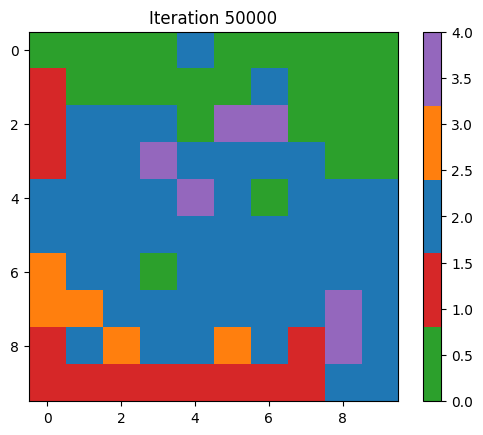

In [19]:
#after mapping x and y: 10 by 10 50000
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
    for col in range(num_cols):
        label_list = map[row][col]
        if len(label_list)==0:
            label = 4
        else:
            label = max(label_list, key=label_list.count)
        label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:blue','tab:orange','tab:purple'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [25]:
#0-Cl 1-COL 2-COH 3-NROI
label_map

array([[0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [1, 2, 2, 2, 0, 4, 4, 0, 0, 0],
       [1, 2, 2, 4, 2, 2, 2, 2, 0, 0],
       [2, 2, 2, 2, 4, 2, 0, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 2, 2, 0, 2, 2, 2, 2, 2, 2],
       [3, 3, 2, 2, 2, 2, 2, 2, 4, 2],
       [1, 2, 3, 2, 2, 3, 2, 1, 4, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2]], dtype=int64)

In [23]:
data = minmax_scaler(data_x) # normalisation

winner_labels = []

for t in range(data.shape[0]):
    winner = winning_neuron(data, t, som, num_rows, num_cols)
    row = winner[0]
    col = winner[1]
    predicted = label_map[row][col]
    winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(data_y_label, np.array(winner_labels)))

Accuracy:  0.8534599728629579


In [32]:
print(winner_labels)

[0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 

# Acc for each label

In [36]:
unique, counts = np.unique(data_y_label, return_counts=True)
dict(zip(unique, counts))

{0: 178, 1: 161, 2: 327, 3: 71}

In [43]:
#accuracy for each label
#0-Cl 1-COL 2-COH 3-NROI
acc_cl = sum(1 for x in winner_labels[:178] if x == 0) / 178
acc_coh = sum(1 for x in winner_labels[178:505] if x == 2) / 327
acc_col = sum(1 for x in winner_labels[505:666] if x == 1) / 161
acc_nroi = sum(1 for x in winner_labels[666:] if x == 3) / 71
print(f"acc_CL: {acc_cl}, acc_COL: {acc_col}, acc_COH: {acc_coh}, acc_NROI: {acc_nroi}")

acc_CL: 0.8764044943820225, acc_COL: 0.8944099378881988, acc_COH: 0.8593272171253823, acc_NROI: 0.676056338028169


In [75]:
unique, counts = np.unique(winner_labels[:178], return_counts=True)
print('among all the CL records:')
for i in range(2):
    temp = unique[i]
    if temp == 0:
        temp = 'CL'
    if temp == 1:
        temp = 'COL'
    if temp == 2:
        temp = 'COH'
    if temp == 3:
        temp = 'NROI'
    print(f'{counts[i]} were classified as {temp}')
print("----------")

unique, counts = np.unique(winner_labels[505:666], return_counts=True)
print('among all the COL records:')
for i in range(4):
    temp = unique[i]
    if temp == 0:
        temp = 'CL'
    if temp == 1:
        temp = 'COL'
    if temp == 2:
        temp = 'COH'
    if temp == 3:
        temp = 'NROI'
    print(f'{counts[i]} were classified as {temp}')
print("---------")


unique, counts = np.unique(winner_labels[178:505], return_counts=True)
print('among all the COH records:')
for i in range(4):
    temp = unique[i]
    if temp == 0:
        temp = 'CL'
    if temp == 1:
        temp = 'COL'
    if temp == 2:
        temp = 'COH'
    if temp == 3:
        temp = 'NROI'
    print(f'{counts[i]} were classified as {temp}')
    
print("---------")
    
unique, counts = np.unique(winner_labels[666:], return_counts=True)
print('among all the NROI records:')
for i in range(3):
    temp = unique[i]
    if temp == 0:
        temp = 'CL'
    if temp == 1:
        temp = 'COL'
    if temp == 2:
        temp = 'COH'
    if temp == 3:
        temp = 'NROI'
    print(f'{counts[i]} were classified as {temp}')

among all the CL records:
156 were classified as CL
22 were classified as COH
----------
among all the COL records:
5 were classified as CL
144 were classified as COL
10 were classified as COH
2 were classified as NROI
---------
among all the COH records:
25 were classified as CL
2 were classified as COL
281 were classified as COH
19 were classified as NROI
---------
among all the NROI records:
4 were classified as COL
19 were classified as COH
48 were classified as NROI
